In [16]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [60]:
n = 2
grover_circuit = QuantumCircuit(n)

In [6]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [56]:
def measure(circuit):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend=backend, shots=1, memory=True)
    return dict(job.result().get_counts(grover_circuit))

In [61]:
grover_circuit = initialize_s(grover_circuit, [0,1])

In [62]:
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [63]:
measure(grover_circuit)

{'00': 0.25, '01': 0.25, '10': 0.25, '11': 0.25}

In [64]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘

In [65]:
measure(grover_circuit)

{'00': 0.25, '01': 0.25, '10': 0.25, '11': 0.25}

In [66]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

In [67]:
measure(grover_circuit)

{'11': 1.0}

In [51]:
dict(measure(grover_circuit).get_counts(grover_circuit))

{'11': 1}

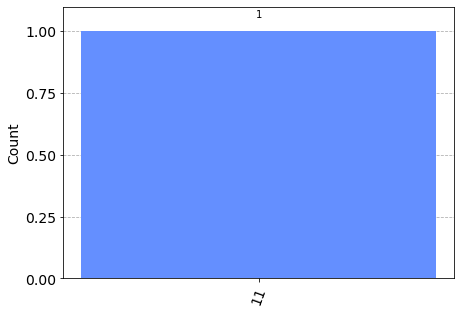

In [49]:
counts = measure(grover_circuit).get_counts(grover_circuit)
plot_histogram(counts)